In [ ]:
'esc' + 'a' new line above
'esc' + 'b' new line below
'esc' + 'dd' delete a cell
'shift' + 'enter'

In [1]:
#!pip install textblob
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
# import web grabbing client and
# HTML parser
# urllib is a native python library that is already available to you.


url = 'http://books.toscrape.com/index.html'

# grab website and store in variable client
client = urlopen(url)
# read and close HTML
page_html = client.read()
client.close()

In [3]:
# call BeautifulSoup for parsing
page_soup = BeautifulSoup(page_html, "html.parser")
# grabs all the products under list tag
bookshelf = page_soup.findAll("li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})


In [4]:
# create csv file of all products
filename = ("Books.csv")
f = open(filename, "w")

headers = "Book title, Price, Availability\n"
f.write(headers)

for books in bookshelf:

    # collect title of all books
    book_title = books.h3.a["title"].replace(',','|')

    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()
    
    book_availability = books.findAll("p", {"class": "instock availability"})[0].text.strip()

    print("Title of book: " + book_title)
    print("Price of book: " + price)
    print("Book availability: "+ book_availability)

    f.write(book_title + "," + price+ "," + book_availability+"\n")

f.close()


Title of book: A Light in the Attic
Price of book: £51.77
Book availability: In stock
Title of book: Tipping the Velvet
Price of book: £53.74
Book availability: In stock
Title of book: Soumission
Price of book: £50.10
Book availability: In stock
Title of book: Sharp Objects
Price of book: £47.82
Book availability: In stock
Title of book: Sapiens: A Brief History of Humankind
Price of book: £54.23
Book availability: In stock
Title of book: The Requiem Red
Price of book: £22.65
Book availability: In stock
Title of book: The Dirty Little Secrets of Getting Your Dream Job
Price of book: £33.34
Book availability: In stock
Title of book: The Coming Woman: A Novel Based on the Life of the Infamous Feminist| Victoria Woodhull
Price of book: £17.93
Book availability: In stock
Title of book: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price of book: £22.60
Book availability: In stock
Title of book: The Black Maria
Price of book: £52.15
Book avai

In [5]:
from selenium import webdriver
import time
url = 'https://books.toscrape.com/'
driver = webdriver.Chrome()
driver.get(url)
print(driver.title)
def get_books_info():
    data = []
    container = driver.find_element_by_xpath('/html/body/div/div/div/div/section/div[2]/ol')
    
    #print(type(container))
    
    titles = container.find_elements_by_tag_name('a')
    for title in titles:
        print(title.text)
        
    prices = container.find_elements_by_class_name('price_color')
    for price in prices:
        print(price.text)
        

    next_page = driver.find_element_by_link_text('next')
    time.sleep(5)
    next_page.click()


for x in range(5):
    get_books_info()
driver.quit()


All products | Books to Scrape - Sandbox

A Light in the ...

Tipping the Velvet

Soumission

Sharp Objects

Sapiens: A Brief History ...

The Requiem Red

The Dirty Little Secrets ...

The Coming Woman: A ...

The Boys in the ...

The Black Maria

Starving Hearts (Triangular Trade ...

Shakespeare's Sonnets

Set Me Free

Scott Pilgrim's Precious Little ...

Rip it Up and ...

Our Band Could Be ...

Olio

Mesaerion: The Best Science ...

Libertarianism for Beginners

It's Only the Himalayas
£51.77
£53.74
£50.10
£47.82
£54.23
£22.65
£33.34
£17.93
£22.60
£52.15
£13.99
£20.66
£17.46
£52.29
£35.02
£57.25
£23.88
£37.59
£51.33
£45.17

In Her Wake

How Music Works

Foolproof Preserving: A Guide ...

Chase Me (Paris Nights ...

Black Dust

Birdsong: A Story in ...

America's Cradle of Quarterbacks: ...

Aladdin and His Wonderful ...

Worlds Elsewhere: Journeys Around ...

Wall and Piece

The Four Agreements: A ...

The Five Love Languages: ...

The Elephant Tree

The Bear and the ...

Sophie's

*Generic Data cleaning steps to take:*

**1. Converting text to lower case** 
* if your data is case insensitive, you'll need to consider your usecase as well
* some exceptions, if there're acronyms, which may lose their meaning if converted to word, e.g. in german language, MIT (university) vs mit (german for with)

**2. Removing punctuations**
* exceptions, twitter data, where punctuations may be good in showing sentiment

**3. Removing any numerical values**

**4. Tokenize text**
* different ways to tokenize the text

**5. Remove stop words**
* stop words can be altered to be usecase specific, 
* e.g. adding restaurant name to list of stopwords for restaurant review, as the people will usually give the restaurant name in the review
* e.g. twitter you may want to add words like 'RT' 'Retweet' etc for tweets


**6. Stemming / lemmatization** 
* different variation of words due to suffix, but the meaning of the word is the same, use of the word is identical, to prevent duplication of words being stored and improve efficiency
* lemmatization result is a proper word, unlike stemming


**7. Parts of speech tagging**
* good for identifying, summarising, to get e.g. retrieval of nouns from large pieces of texts (NNP)

**8. Create bi-grams or tri-grams**

**9. Deal with typos and spelling mistakes**

In [17]:
#!pip install spacy
#!python -m spacy download en_core_web_sm 
#en_core_web_md, en_core_web_lg, en

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [19]:
para = nlp('''Hello Mr. Tan, this is the first sentence. 
           This is the second sentence. 
           Notice, the abbreviations, e.g. Mr. Goh, Ms. Ng, do not get tokenised wrongly.''')

In [20]:
for sent in para.sents:
    print(sent)

Hello Mr. Tan, this is the first sentence.

           
This is the second sentence.

           Notice, the abbreviations, e.g. Mr. Goh, Ms. Ng, do not get tokenised wrongly.


In [21]:
all_stopwords = nlp.Defaults.stop_words

In [23]:
sentence = nlp('I went to the nearby grocers to buy ten oranges and 5 apples.')
for word in sentence:
    print(word, word.is_stop)

I True
went False
to True
the True
nearby False
grocers False
to True
buy False
ten True
oranges False
and True
5 False
apples False
. False


In [24]:
tokens = [token.text for token in sentence if not token.is_stop]


In [25]:
all_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [26]:
all_stopwords.add('retweet') # RT,

In [27]:
all_stopwords.update({'zooloo','zzz'})

In [ ]:
#all_stopwords.remove('single') #discard
#all_stopwords.difference_update({'multiple','to','remove'})

### Lemmatization

In [28]:
doc = nlp('She was better than the best in atheletics. She was a great runner. Running was her passion.')

In [29]:
for token in doc:
    print(token, token.lemma_)

She she
was be
better well
than than
the the
best good
in in
atheletics atheletic
. .
She she
was be
a a
great great
runner runner
. .
Running running
was be
her her
passion passion
. .


In [ ]:
#doing stemming -- > NLTK natural language toolkit for python, porter stemmer and snowball stemmer

### POS Tags

In [31]:
sentence = nlp('He left his keys in his left pocket.')

for token in sentence:
    print('{} - {}'.format(token, token.pos_))

He - PRON
left - VERB
his - PRON
keys - NOUN
in - ADP
his - PRON
left - ADJ
pocket - NOUN
. - PUNCT


### NER

In [32]:

# Print all named entities with named entity types

doc_2 = nlp("I went out with Jane to the Apple store in Orchard to buy an iphone. It cost me $800. After that I stopped for an apple pie.")
for ent in doc_2.ents:
    print('{} - {}'.format(ent, ent.label_))

Jane - PERSON
Apple - ORG
800 - MONEY




1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

In [6]:
text = 'It was a sad day.'
#text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = TextBlob(text)


In [7]:
doc.sentiment.polarity

-0.5

In [8]:
doc.sentiment.subjectivity

1.0

In [9]:
page = requests.get('https://www.lyrics.com/lyric/36863481/Justin+Bieber/Yummy')

In [10]:
html = BeautifulSoup(page.text, "html.parser")

In [11]:
lyrics = html.find("pre", class_="lyric-body").text

https://www.lyrics.com/lyric/36863481/Justin+Bieber/Yummy
https://www.lyrics.com/lyric/35362456/Ed+Sheeran/Castle+on+the+Hill
https://www.lyrics.com/lyric/35342586/Taylor+Swift/22
https://www.lyrics.com/lyric/36147543/Kygo/Happy+Now
https://www.lyrics.com/sublyric/58125/Lauv/Superhero
https://www.lyrics.com/lyric/30514737/Fix+You
https://www.lyrics.com/lyric/32981724/One+Direction/Perfect
https://www.lyrics.com/lyric/36489666/Bahari/Crashing
https://www.lyrics.com/lyric/33787626/ROZES/Matches
https://www.lyrics.com/lyric/36341880/Maroon+5/She+Will+Be+Loved
https://www.lyrics.com/lyric/25306933/Queen/Dont+Stop+Me+Now
https://www.lyrics.com/lyric/31781320/Eric+Clapton/Tears+In+Heaven


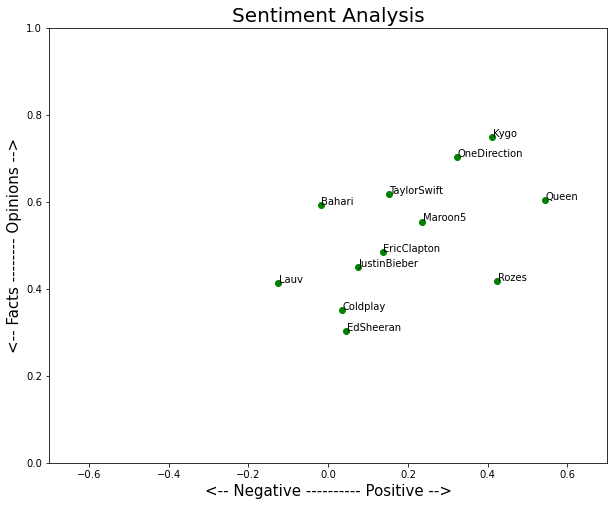

In [12]:
def scrape_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, "html.parser")
    lyrics = html.find("pre", class_="lyric-body").get_text()
    print(url)
    return lyrics.replace("\n"," ")


links = ['https://www.lyrics.com/lyric/36863481/Justin+Bieber/Yummy',
     'https://www.lyrics.com/lyric/35362456/Ed+Sheeran/Castle+on+the+Hill',
     'https://www.lyrics.com/lyric/35342586/Taylor+Swift/22',
     'https://www.lyrics.com/lyric/36147543/Kygo/Happy+Now',
     'https://www.lyrics.com/sublyric/58125/Lauv/Superhero',
     'https://www.lyrics.com/lyric/30514737/Fix+You',
     'https://www.lyrics.com/lyric/32981724/One+Direction/Perfect',
     'https://www.lyrics.com/lyric/36489666/Bahari/Crashing',
     'https://www.lyrics.com/lyric/33787626/ROZES/Matches',
     'https://www.lyrics.com/lyric/36341880/Maroon+5/She+Will+Be+Loved',
     'https://www.lyrics.com/lyric/25306933/Queen/Dont+Stop+Me+Now',
     'https://www.lyrics.com/lyric/31781320/Eric+Clapton/Tears+In+Heaven']


lyrics = [scrape_lyrics(link) for link in links]

artists = ['JustinBieber', 'EdSheeran', 'TaylorSwift', 'Kygo', 'Lauv', 'Coldplay', 'OneDirection','Bahari','Rozes','Maroon5', 'Queen', 'EricClapton']

#fun fact: queen dont stop me now is apparently the happiest song, and eric clapton is supposedly a sad song
# https://www.indy100.com/article/dont-stop-me-now-is-the-happiest-song-in-the-world-according-to-a-neuroscientist-7318321
#but there's more to the what affects the sentiment of the song, not just the lyrics, e.g. tempo

df = pd.DataFrame({'Lyrics':lyrics}, index=artists)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Lyrics'].apply(pol)
df['subjectivity'] = df['Lyrics'].apply(sub)

plt.rcParams['figure.figsize'] = [10, 8]

for artist in df.index:
    x = df.polarity.loc[artist]
    y = df.subjectivity.loc[artist]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, artist, fontsize=10)
    plt.xlim(-.7, .7) 
    plt.ylim(0,1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ---------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [13]:
df

,Lyrics,polarity,subjectivity
JustinBieber,"Yeah, you got that yummy, yum That yummy, yum ...",0.075000,0.450000
EdSheeran,When I was six years old I broke my leg I was ...,0.044944,0.302763
TaylorSwift,It feels like a perfect night to dress up like...,0.151786,0.618155
Kygo,"We don't wanna believe it, that it's all gone ...",0.411231,0.749952
Lauv,I met a superhero\r I lost her\r I want her ba...,-0.125000,0.412500
Coldplay,When you try your best but you don't succeed W...,0.035111,0.351556
OneDirection,I might never be your knight in shinin' armor ...,0.323796,0.702644
Bahari,Intoxicating your kiss Intoxicating your lips...,-0.018403,0.593403
Rozes,I remember how we used to be so beautiful You ...,0.423869,0.417202
Maroon5,Beauty queen of only eighteen She had some tro...,0.236190,0.554524
